<a href="https://colab.research.google.com/github/jasantosm/news_scraper/blob/master/Data_cleaning_recipe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Read Data

In [0]:
import pandas as pd

In [18]:
el_universal = pd.read_csv('/content/clean_eluniversal_2020_04_05_articles.csv')

el_universal.head()

,uid,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body
0,69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351
1,5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202
2,647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110
3,0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207
4,4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239


# Data wrangling

In [19]:
# 1. Añadir el newspaper_uid al DataFrame

el_universal['newspaper_uid'] = 'eluniversal'
el_universal

,uid,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body,newspaper_uid
0,69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351,eluniversal
1,5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202,eluniversal
2,647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110,eluniversal
3,0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207,eluniversal
4,4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239,eluniversal
...,...,...,...,...,...,...,...,...,...
121,d78d38ff59e9b02faf446d245bd50727,googletag.cmd.push(function() { ...,Visita museos virtuales en el mundo: Museo de ...,http://www.unionpuebla.mx/articulo/2020/04/01/...,eluniversal,www.unionpuebla.mx,7,295,eluniversal
122,04fab2861b816ec8b03ecd3ee56b8507,Un policía preventivo resultó herido durante u...,asaltante de automovilistas termina muerto tra...,https://www.elgrafico.mx/la-roja/asaltante-de-...,eluniversal,www.elgrafico.mx,9,79,eluniversal
123,52adf651f36c8097f61f7f7447414d86,"A un año de su nacimiento, el Cobro Digital ...","CoDi, un aliado para Susana Distancia",http://www.eluniversal.com.mx/cartera/codi-un-...,eluniversal,www.eluniversal.com.mx,4,405,eluniversal
124,13621446953806ad23a85c384daf30e6,Durante la contigencia por el Covid-19 es pos...,Una forma de activar la mente desde casa,https://www.eluniversalqueretaro.mx/portada/un...,eluniversal,www.eluniversalqueretaro.mx,4,299,eluniversal


In [20]:
# 2. Obtener el host
from urllib.parse import urlparse

el_universal['host'] = el_universal['url'].apply(lambda url: urlparse(url).netloc)

el_universal

,uid,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body,newspaper_uid
0,69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351,eluniversal
1,5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202,eluniversal
2,647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110,eluniversal
3,0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207,eluniversal
4,4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239,eluniversal
...,...,...,...,...,...,...,...,...,...
121,d78d38ff59e9b02faf446d245bd50727,googletag.cmd.push(function() { ...,Visita museos virtuales en el mundo: Museo de ...,http://www.unionpuebla.mx/articulo/2020/04/01/...,eluniversal,www.unionpuebla.mx,7,295,eluniversal
122,04fab2861b816ec8b03ecd3ee56b8507,Un policía preventivo resultó herido durante u...,asaltante de automovilistas termina muerto tra...,https://www.elgrafico.mx/la-roja/asaltante-de-...,eluniversal,www.elgrafico.mx,9,79,eluniversal
123,52adf651f36c8097f61f7f7447414d86,"A un año de su nacimiento, el Cobro Digital ...","CoDi, un aliado para Susana Distancia",http://www.eluniversal.com.mx/cartera/codi-un-...,eluniversal,www.eluniversal.com.mx,4,405,eluniversal
124,13621446953806ad23a85c384daf30e6,Durante la contigencia por el Covid-19 es pos...,Una forma de activar la mente desde casa,https://www.eluniversalqueretaro.mx/portada/un...,eluniversal,www.eluniversalqueretaro.mx,4,299,eluniversal


In [21]:
el_universal['host'].value_counts()

www.eluniversal.com.mx         72
www.viveusa.mx                 12
www.elgrafico.mx                6
de10.com.mx                     6
www.eluniversalqueretaro.mx     5
sanluis.eluniversal.com.mx      4
oaxaca.eluniversal.com.mx       4
www.unionedomex.mx              3
www.unionjalisco.mx             3
www.unionguanajuato.mx          3
www.unionpuebla.mx              3
www.unionyucatan.mx             2
www.unioncdmx.mx                1
eluniversal.com.mx              1
www.clubeluniversal.mx          1
Name: host, dtype: int64

# Missing Data

In [22]:
# 3. Rellenar datos faltantes

missing_titles_mask = el_universal['title'].isna()

missing_titles = (el_universal[missing_titles_mask]['url']
                    .str.extract(r'(?P<missing_titles>[^/]+)$')
                    .applymap(lambda title: title.split('-'))
                    .applymap(lambda title_word_list: ' '.join(title_word_list))
                  )

missing_titles

,missing_titles


In [0]:
el_universal.loc[missing_titles_mask, 'title'] = missing_titles.loc[:,'missing_titles']

# Additional Cleanup

In [24]:
import hashlib
uids = (el_universal
          .apply(lambda row: hashlib.md5(bytes(row['url'].encode())), axis=1)
          .apply(lambda hash_object: hash_object.hexdigest())
      )
el_universal['uid'] = uids
el_universal.set_index('uid', inplace=True)

el_universal

,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body,newspaper_uid
uid,,,,,,,,
69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351,eluniversal
5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202,eluniversal
647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110,eluniversal
0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207,eluniversal
4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239,eluniversal
...,...,...,...,...,...,...,...,...
d78d38ff59e9b02faf446d245bd50727,googletag.cmd.push(function() { ...,Visita museos virtuales en el mundo: Museo de ...,http://www.unionpuebla.mx/articulo/2020/04/01/...,eluniversal,www.unionpuebla.mx,7,295,eluniversal
04fab2861b816ec8b03ecd3ee56b8507,Un policía preventivo resultó herido durante u...,asaltante de automovilistas termina muerto tra...,https://www.elgrafico.mx/la-roja/asaltante-de-...,eluniversal,www.elgrafico.mx,9,79,eluniversal
52adf651f36c8097f61f7f7447414d86,"A un año de su nacimiento, el Cobro Digital ...","CoDi, un aliado para Susana Distancia",http://www.eluniversal.com.mx/cartera/codi-un-...,eluniversal,www.eluniversal.com.mx,4,405,eluniversal


In [25]:
#limpiar caracteres especiales



stripped_body = (el_universal.apply(lambda row: row['body'], axis = 1)
                             .apply(lambda body: list(body))
                             .apply(lambda letters: list(map(lambda letter: letter.replace('\n', ''), letters)))
                             .apply(lambda letters: ''.join(letters))
                )

stripped_body

uid
69f7915cdb319f4dc60aecc778e28106      Al cierre de diciembre pasado, hace casi 100...
5cadddd572cf0374bbb67a5819bed5d5     El gobernador de Nueva York, Andrew Cuomo, a ...
647ea4ebb9daf0dab913017bb9321121     Después de varias gestiones con autoridades d...
0cb80d55564f64b8270733bf688708e2      El reacomodo de fuerzas que supone la entrad...
4aba980bf64de2d94347b1a725df91bd     Todas las plazas comerciales y cerca de 80% d...
                                                          ...                        
d78d38ff59e9b02faf446d245bd50727            googletag.cmd.push(function() {       ...
04fab2861b816ec8b03ecd3ee56b8507    Un policía preventivo resultó herido durante u...
52adf651f36c8097f61f7f7447414d86      A un año de su nacimiento, el Cobro Digital ...
13621446953806ad23a85c384daf30e6     Durante la contigencia por el Covid-19 es pos...
d73767119a3af98d5c879e046f1ad339     0 % PULSO SOCIAL0 Cuando Iron Man (2008) se e...
Length: 126, dtype: object

# Data Enrichment

In [26]:
import nltk
from nltk.corpus import stopwords

# nltk ayuda a trabajar con lenguaje natural

nltk.download('punkt')
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))

def tokenize_column(df, column_name):
  return (df
            .dropna()
            .apply(lambda row: nltk.word_tokenize(row[column_name]), axis = 1)
            .apply(lambda tokens: list(filter(lambda token: token.isalpha(), tokens)))
            .apply(lambda tokens: list(map(lambda token: token.lower(), tokens)))
            .apply(lambda word_list: list(filter(lambda word: word not in stop_words, word_list)))      
            .apply(lambda valid_word_list: len (valid_word_list))
          )

el_universal['n_tokens_title'] = tokenize_column(el_universal, 'title')
el_universal['n_tokens_body'] = tokenize_column(el_universal, 'body')
el_universal

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body,newspaper_uid
uid,,,,,,,,
69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351,eluniversal
5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202,eluniversal
647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110,eluniversal
0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207,eluniversal
4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239,eluniversal
...,...,...,...,...,...,...,...,...
d78d38ff59e9b02faf446d245bd50727,googletag.cmd.push(function() { ...,Visita museos virtuales en el mundo: Museo de ...,http://www.unionpuebla.mx/articulo/2020/04/01/...,eluniversal,www.unionpuebla.mx,7,295,eluniversal
04fab2861b816ec8b03ecd3ee56b8507,Un policía preventivo resultó herido durante u...,asaltante de automovilistas termina muerto tra...,https://www.elgrafico.mx/la-roja/asaltante-de-...,eluniversal,www.elgrafico.mx,9,79,eluniversal
52adf651f36c8097f61f7f7447414d86,"A un año de su nacimiento, el Cobro Digital ...","CoDi, un aliado para Susana Distancia",http://www.eluniversal.com.mx/cartera/codi-un-...,eluniversal,www.eluniversal.com.mx,4,405,eluniversal


# Duplicate values

In [27]:
el_universal['title'].value_counts()

Así enfrentan los ikoots a la emergencia sanitaria                                             1
Las mujeres hierberas de ayer y hoy                                                            1
UnADM: Carreras y maestrías en línea en la Universidad de la SEP                               1
Wrestlemania 36, así se vivió el primer día; Undertaker extiende su racha en la gran fiesta    1
la estricta y dificil vida de enrique alvarez felix                                            1
                                                                                              ..
Se resisten a cumplir aislamiento por coronavirus en CDMX y Edomex                             1
Policía Cibernética alerta por cuenta de correo apócrifa de la titular de Salud en SLP         1
los 5 tipos de profesionistas mas solicitados en canada                                        1
Crisis sanitaria genera dilema sobre salarios                                                  1
consuelo duval le hace escena 

In [0]:
# Elminar duplicados
el_universal.drop_duplicates(subset=['title'], keep = 'first', inplace=True)

# Tabla Final

In [29]:

el_universal

,body,title,url,news_site_uid,host,n_tokens_title,n_tokens_body,newspaper_uid
uid,,,,,,,,
69f7915cdb319f4dc60aecc778e28106,"Al cierre de diciembre pasado, hace casi 100...",La (verdadera) hora de AMLO,https://www.eluniversal.com.mx/opinion/roberto...,eluniversal,www.eluniversal.com.mx,3,351,eluniversal
5cadddd572cf0374bbb67a5819bed5d5,"El gobernador de Nueva York, Andrew Cuomo, a ...",coronavirus que significa la ley matilda en nu...,https://www.viveusa.mx/noticias/coronavirus-qu...,eluniversal,www.viveusa.mx,6,202,eluniversal
647ea4ebb9daf0dab913017bb9321121,Después de varias gestiones con autoridades d...,Podrán mexicanos desembarcar de crucero que ha...,http://www.eluniversal.com.mx/nacion/podran-me...,eluniversal,www.eluniversal.com.mx,10,110,eluniversal
0cb80d55564f64b8270733bf688708e2,El reacomodo de fuerzas que supone la entrad...,Liderazgo perdido,https://www.eluniversal.com.mx/opinion/editori...,eluniversal,www.eluniversal.com.mx,2,207,eluniversal
4aba980bf64de2d94347b1a725df91bd,Todas las plazas comerciales y cerca de 80% d...,Casi 80% de los comercios permanecen cerrados,https://www.eluniversalqueretaro.mx/portada/ca...,eluniversal,www.eluniversalqueretaro.mx,4,239,eluniversal
...,...,...,...,...,...,...,...,...
d78d38ff59e9b02faf446d245bd50727,googletag.cmd.push(function() { ...,Visita museos virtuales en el mundo: Museo de ...,http://www.unionpuebla.mx/articulo/2020/04/01/...,eluniversal,www.unionpuebla.mx,7,295,eluniversal
04fab2861b816ec8b03ecd3ee56b8507,Un policía preventivo resultó herido durante u...,asaltante de automovilistas termina muerto tra...,https://www.elgrafico.mx/la-roja/asaltante-de-...,eluniversal,www.elgrafico.mx,9,79,eluniversal
52adf651f36c8097f61f7f7447414d86,"A un año de su nacimiento, el Cobro Digital ...","CoDi, un aliado para Susana Distancia",http://www.eluniversal.com.mx/cartera/codi-un-...,eluniversal,www.eluniversal.com.mx,4,405,eluniversal


# Descriptive Analysis

In [0]:
clean_eluniversal = pd.read_csv('/content/clean_eluniversal_2020_04_05_articles.csv')

In [31]:
clean_eluniversal.describe()

,n_tokens_title,n_tokens_body
count,126.000000,126.000000
mean,5.841270,315.841270
std,2.025488,240.732861
min,1.000000,9.000000
25%,4.250000,165.500000
50%,6.000000,243.000000
75%,7.000000,356.500000
max,10.000000,1421.000000


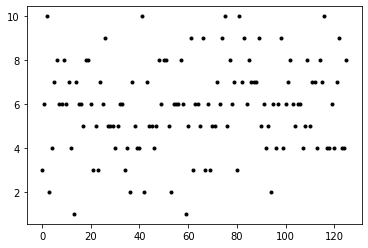

In [32]:
clean_eluniversal['n_tokens_title'].plot(style = 'k.')


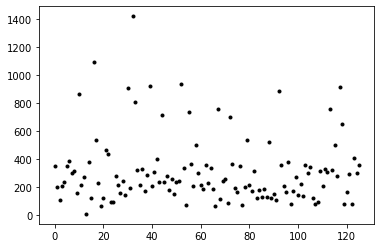

In [33]:
clean_eluniversal['n_tokens_body'].plot(style = 'k.')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ca0fa9860>,
      dtype=object)

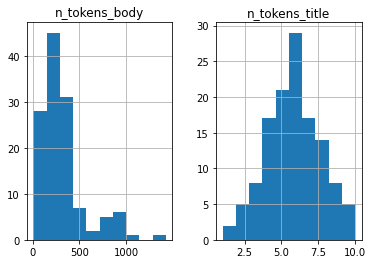

In [34]:
clean_eluniversal.hist()